In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('DataFrame.csv')

In [3]:
df.head()

,Type,Date,Time,open,high,low,close,Unnamed: 7
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        22805 non-null  object 
 1   Date        22805 non-null  int64  
 2   Time        22805 non-null  object 
 3   open        22805 non-null  float64
 4   high        22805 non-null  float64
 5   low         22805 non-null  float64
 6   close       22805 non-null  float64
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.4+ MB


In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

Type              0
Date              0
Time              0
open              0
high              0
low               0
close             0
Unnamed: 7    22805
dtype: int64

In [7]:
df.drop(['Unnamed: 7'],axis=1,inplace=True)

In [8]:
df[df.duplicated()]

,Type,Date,Time,open,high,low,close


In [9]:
df["Type"].value_counts()

NIFTY    22805
Name: Type, dtype: int64

In [10]:
df["hour"] = pd.to_datetime(df["Time"]).dt.hour
df["min"] = pd.to_datetime(df["Time"]).dt.minute
df.drop(["Time"], axis = 1, inplace = True)

In [11]:
df.head()

,Type,Date,open,high,low,close,hour,min
0,NIFTY,20210101,13997.90,14020.85,13991.35,14013.15,9,16
1,NIFTY,20210101,14014.85,14018.55,14008.15,14009.05,9,17
2,NIFTY,20210101,14008.05,14013.10,14005.05,14012.70,9,18
3,NIFTY,20210101,14013.65,14019.10,14013.65,14016.20,9,19
4,NIFTY,20210101,14015.45,14017.80,14011.95,14015.45,9,20


In [12]:
df['Date'] = pd.to_datetime(df["Date"],format="%Y%m%d")

In [13]:
df["year"] = pd.to_datetime(df["Date"]).dt.year
df["month"] = pd.to_datetime(df["Date"]).dt.month
df["day"] = pd.to_datetime(df["Date"]).dt.day
df.drop(["Date"], axis = 1, inplace = True)

In [14]:
df.head()

,Type,open,high,low,close,hour,min,year,month,day
0,NIFTY,13997.90,14020.85,13991.35,14013.15,9,16,2021,1,1
1,NIFTY,14014.85,14018.55,14008.15,14009.05,9,17,2021,1,1
2,NIFTY,14008.05,14013.10,14005.05,14012.70,9,18,2021,1,1
3,NIFTY,14013.65,14019.10,14013.65,14016.20,9,19,2021,1,1
4,NIFTY,14015.45,14017.80,14011.95,14015.45,9,20,2021,1,1


In [15]:
df.describe()

,open,high,low,close,hour,min,year,month,day
count,22805.000000,22805.000000,22805.000000,22805.000000,22805.000000,22805.00000,22805.0,22805.000000,22805.000000
mean,14703.322396,14707.486481,14699.102201,14703.260816,11.911072,29.21298,2021.0,2.016707,14.573339
std,391.377498,391.265231,391.551643,391.366248,1.867000,17.01660,0.0,0.824087,8.543913
min,13604.750000,13614.400000,13596.750000,13602.800000,9.000000,0.00000,2021.0,1.000000,1.000000
25%,14462.250000,14465.950000,14458.050000,14461.950000,10.000000,15.00000,2021.0,1.000000,8.000000
50%,14739.500000,14743.000000,14735.850000,14739.450000,12.000000,29.00000,2021.0,2.000000,15.000000
75%,15037.000000,15041.250000,15032.500000,15036.850000,13.000000,44.00000,2021.0,3.000000,22.000000
max,15429.500000,15431.750000,15427.900000,15430.200000,17.000000,59.00000,2021.0,3.000000,31.000000


In [16]:
df['change']=(df['close']-df['open'])

In [17]:
df.head()

,Type,open,high,low,close,hour,min,year,month,day,change
0,NIFTY,13997.90,14020.85,13991.35,14013.15,9,16,2021,1,1,15.25
1,NIFTY,14014.85,14018.55,14008.15,14009.05,9,17,2021,1,1,-5.80
2,NIFTY,14008.05,14013.10,14005.05,14012.70,9,18,2021,1,1,4.65
3,NIFTY,14013.65,14019.10,14013.65,14016.20,9,19,2021,1,1,2.55
4,NIFTY,14015.45,14017.80,14011.95,14015.45,9,20,2021,1,1,0.00


In [18]:
df['year'].value_counts()

2021    22805
Name: year, dtype: int64

(array([0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25]),
 <a list of 11 Text xticklabel objects>)

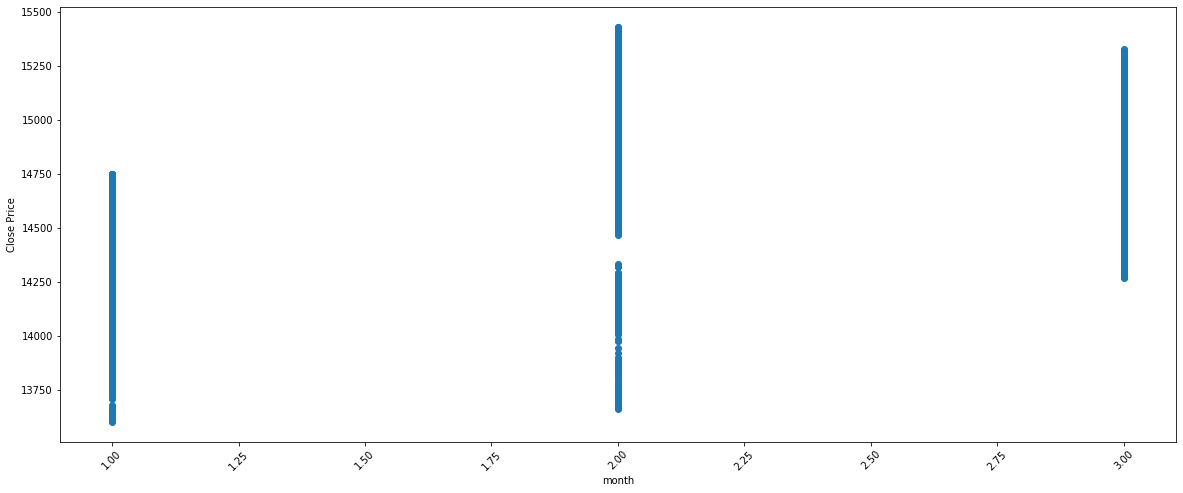

In [19]:
plt.figure(figsize=(20,8))
plt.scatter('month','close',data=df)
plt.xlabel('month')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

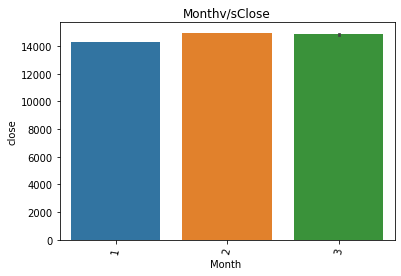

In [20]:
v1=sns.barplot(x='month', y='close', data=df);
v1.set_title('Monthv/sClose')
v1.set_ylabel('close')
v1.set_xlabel('Month ')
v1.set_xticklabels(v1.get_xticklabels(), rotation=80);

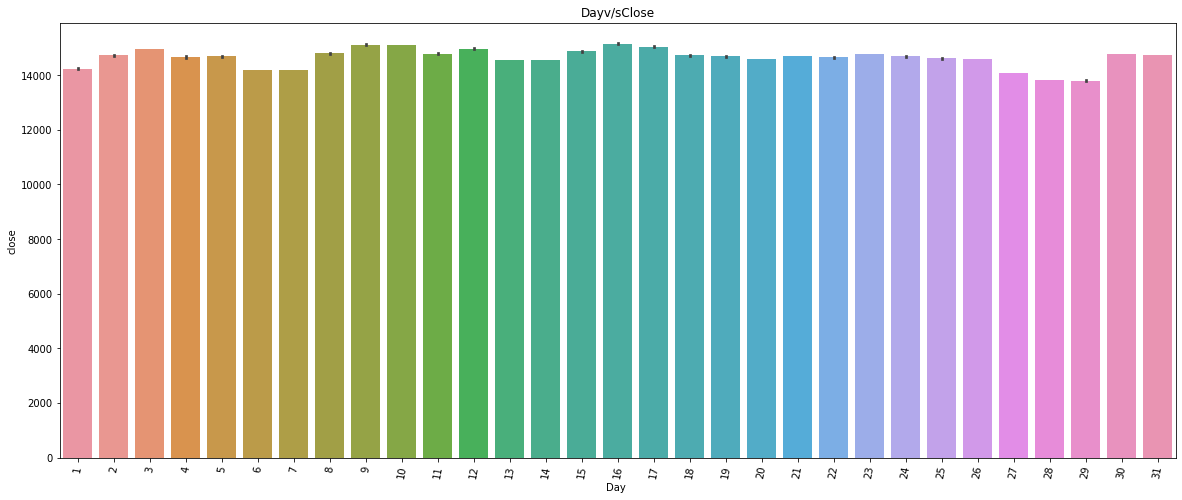

In [21]:
plt.figure(figsize=(20,8))
v1=sns.barplot(x='day', y='close', data=df);
v1.set_title('Dayv/sClose')
v1.set_ylabel('close')
v1.set_xlabel('Day ')
v1.set_xticklabels(v1.get_xticklabels(), rotation=80);

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text xticklabel objects>)

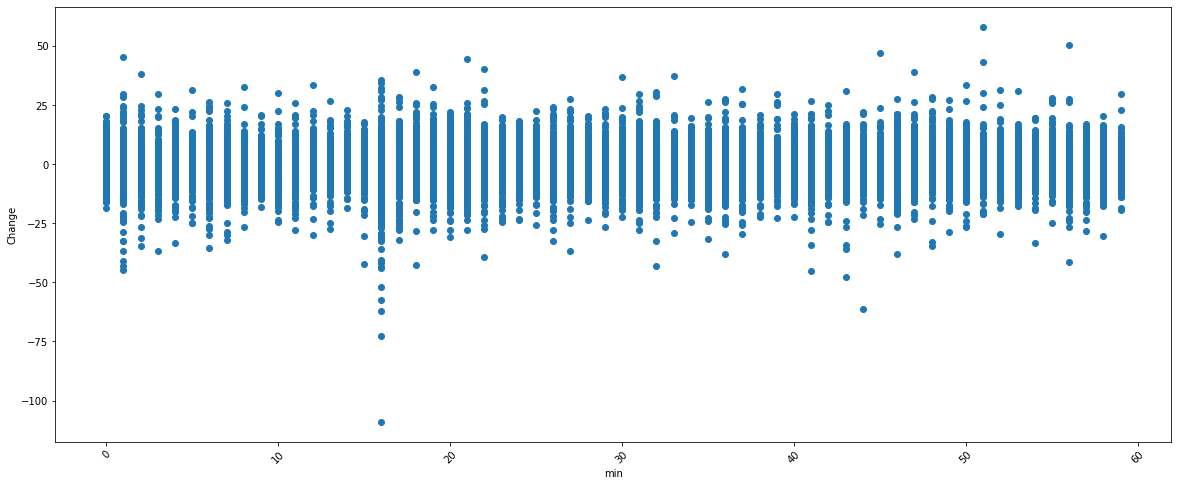

In [22]:
plt.figure(figsize=(20,8))
plt.scatter('min','change',data=df)
plt.xlabel('min')
plt.ylabel('Change')
plt.xticks(rotation=45)

(array([ 8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18.]),
 <a list of 11 Text xticklabel objects>)

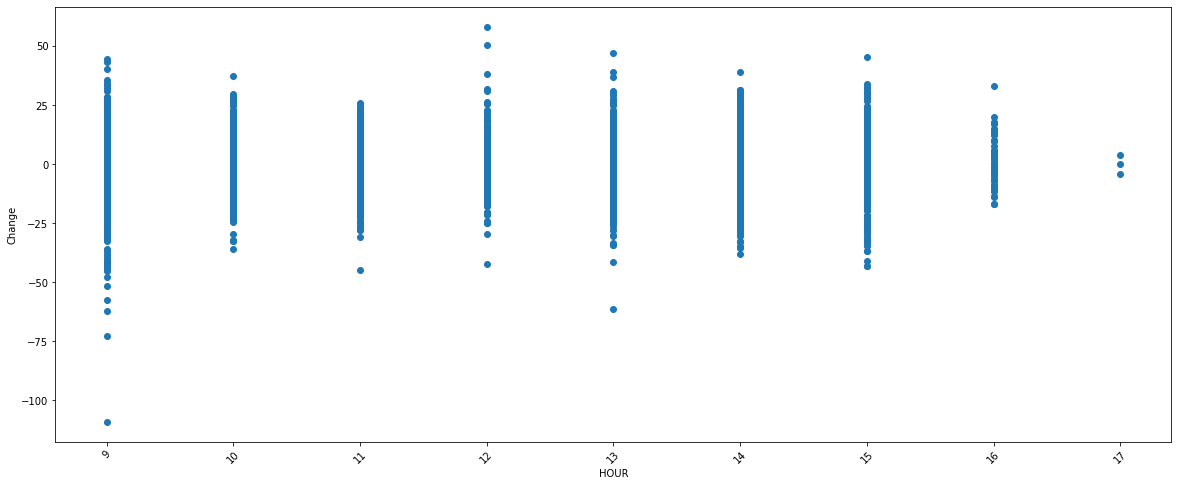

In [23]:
plt.figure(figsize=(20,8))
plt.scatter('hour','change',data=df)
plt.xlabel('HOUR')
plt.ylabel('Change')
plt.xticks(rotation=45)

In [24]:
df['Daily Lag'] = df['close'].shift(1)
df.head()

,Type,open,high,low,close,hour,min,year,month,day,change,Daily Lag
0,NIFTY,13997.90,14020.85,13991.35,14013.15,9,16,2021,1,1,15.25,NaN
1,NIFTY,14014.85,14018.55,14008.15,14009.05,9,17,2021,1,1,-5.80,14013.15
2,NIFTY,14008.05,14013.10,14005.05,14012.70,9,18,2021,1,1,4.65,14009.05
3,NIFTY,14013.65,14019.10,14013.65,14016.20,9,19,2021,1,1,2.55,14012.70
4,NIFTY,14015.45,14017.80,14011.95,14015.45,9,20,2021,1,1,0.00,14016.20


In [25]:
df['Daily Returns'] = (df['Daily Lag']/df['close']) -1
df.head()

,Type,open,high,low,close,hour,min,year,month,day,change,Daily Lag,Daily Returns
0,NIFTY,13997.90,14020.85,13991.35,14013.15,9,16,2021,1,1,15.25,NaN,NaN
1,NIFTY,14014.85,14018.55,14008.15,14009.05,9,17,2021,1,1,-5.80,14013.15,0.000293
2,NIFTY,14008.05,14013.10,14005.05,14012.70,9,18,2021,1,1,4.65,14009.05,-0.000260
3,NIFTY,14013.65,14019.10,14013.65,14016.20,9,19,2021,1,1,2.55,14012.70,-0.000250
4,NIFTY,14015.45,14017.80,14011.95,14015.45,9,20,2021,1,1,0.00,14016.20,0.000054


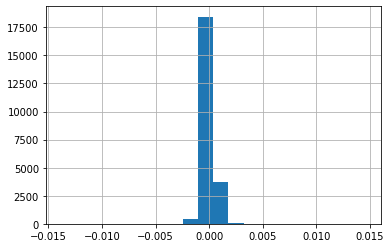

In [26]:
df['Daily Returns'].hist(bins=20)

(array([ 8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18.]),
 <a list of 11 Text xticklabel objects>)

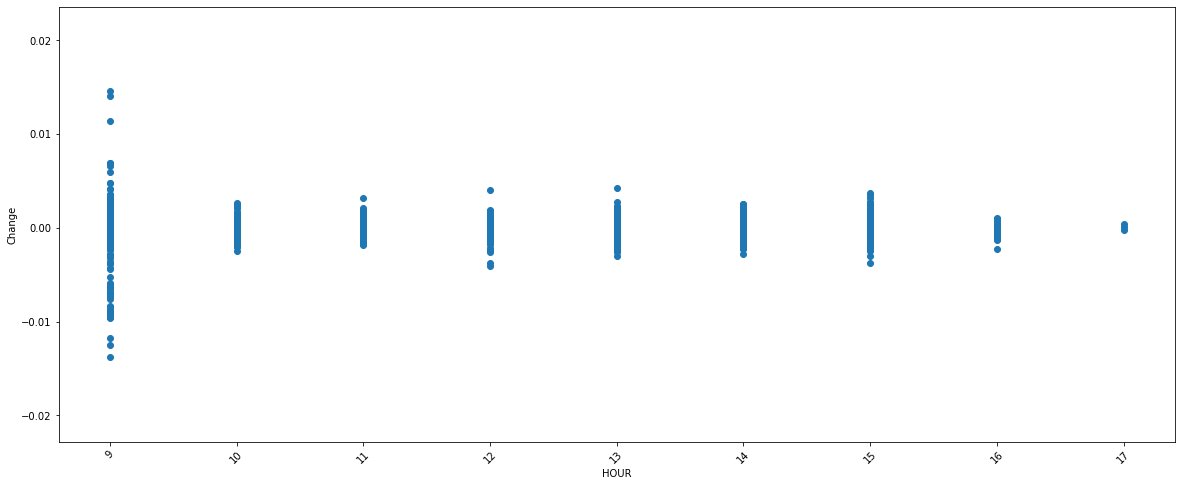

In [27]:
plt.figure(figsize=(20,8))
plt.scatter('hour','Daily Returns',data=df)
plt.xlabel('HOUR')
plt.ylabel('Change')
plt.xticks(rotation=45)

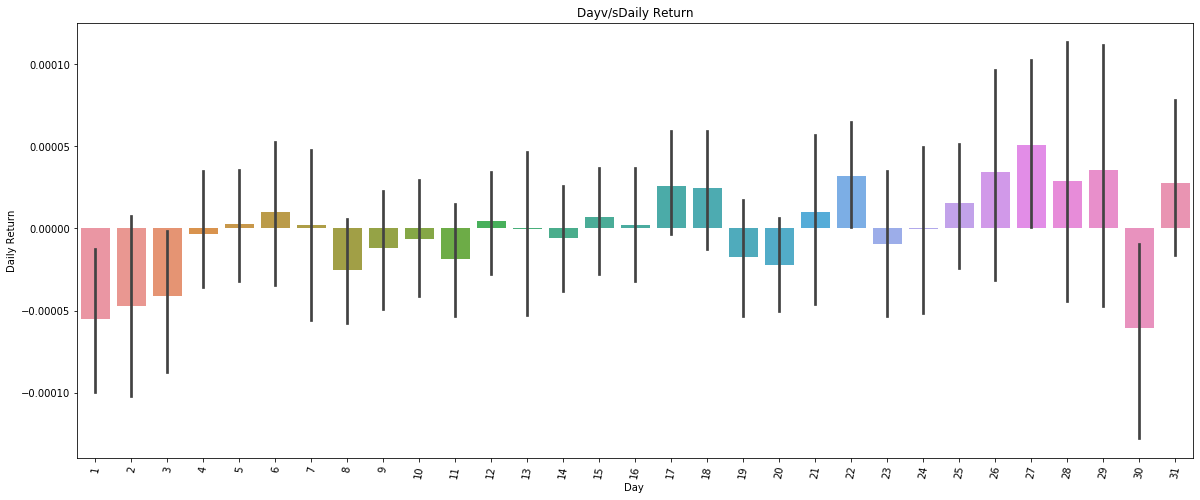

In [28]:
plt.figure(figsize=(20,8))
v1=sns.barplot(x='day', y='Daily Returns', data=df);
v1.set_title('Dayv/sDaily Return')
v1.set_ylabel('Daily Return')
v1.set_xlabel('Day ')
v1.set_xticklabels(v1.get_xticklabels(), rotation=80);

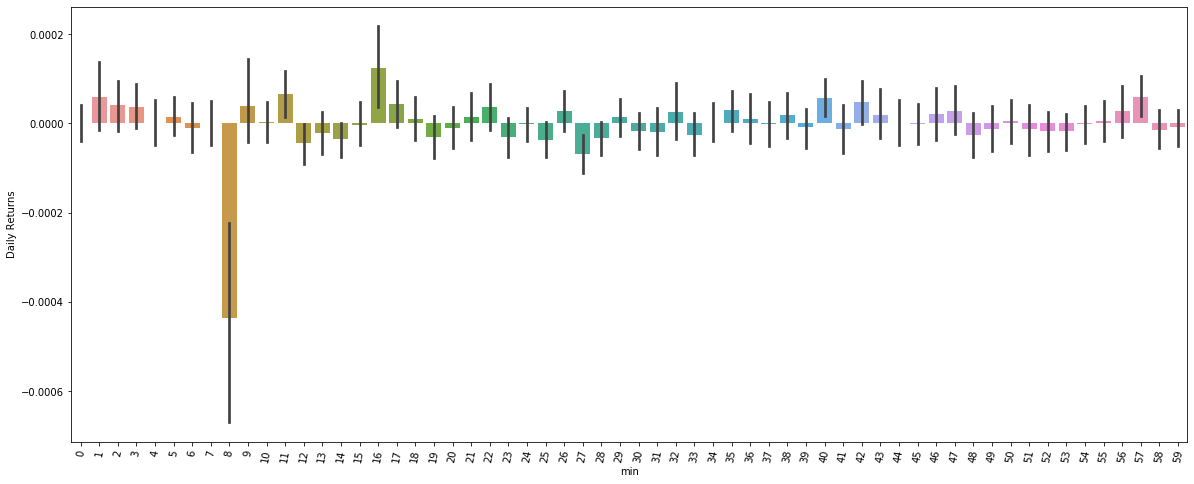

In [29]:
plt.figure(figsize=(20,8))
v1=sns.barplot(x='min', y='Daily Returns', data=df);
v1.set_xticklabels(v1.get_xticklabels(), rotation=80);

<Figure size 1440x576 with 0 Axes>

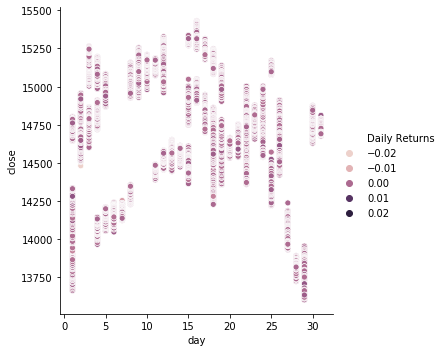

In [33]:
plt.figure(figsize=(20,8))
sns.relplot(x='day', y='close', hue='Daily Returns', data=df)